In [2]:
# Import tools for data and machine learning
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [4]:
# Load the CSV file you downloaded
data = pd.read_csv('predictive_maintenance.csv')

# Display the first 5 rows to understand the data
print("First 5 rows of the dataset:")
print(data.head())

First 5 rows of the dataset:
   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   
3                    1433         39.5                7                0    0   
4                    1408         40.0                9                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1  

In [5]:
# Remove rows with missing values (if any)
data = data.dropna()

# Separate features (X) and target (y)
# We’re predicting "Machine failure" (1 = failure, 0 = no failure)
X = data.drop(['UDI', 'Product ID', 'Machine failure'], axis=1)  # Remove irrelevant columns
y = data['Machine failure']

# Convert categorical columns like "Type" to numbers (A=0, B=1, C=2)
X = pd.get_dummies(X, columns=['Type'])

In [6]:
# Split data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Create a Random Forest model (like a team of decision trees)
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model using the training data
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [8]:
# Predict failures on the test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 99.90%


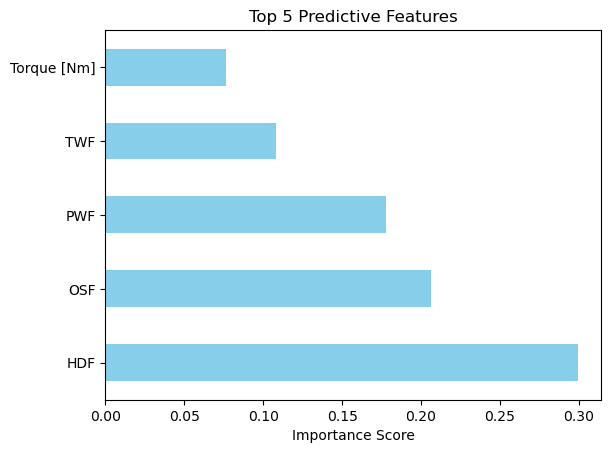

In [9]:
# See which sensors/features matter most
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(5).plot(kind='barh', color='skyblue')
plt.title('Top 5 Predictive Features')
plt.xlabel('Importance Score')
plt.show()

In [10]:
pip install flask

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [14]:
from flask import Flask, request, jsonify
import pandas as pd
import joblib

app = Flask(__name__)

# Load the trained model
model = joblib.load('model.pkl')

@app.route('/predict', methods=['POST'])
def predict():
    data = request.json
    input_data = pd.DataFrame([data])
    prediction = model.predict(input_data)
    return jsonify({'prediction': int(prediction[0])})

if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3534: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [13]:
import joblib

# Save the trained model to your project folder
joblib.dump(model, 'model.pkl')
print("Model saved as model.pkl!")

Model saved as model.pkl!
